# On Parcels
> An introductory article to Voxels' Parcel Data

- toc: true
- filename: Parcels
- tab: CVMinigames | Parcels
- title: CVMinigames
- template: article
- description: this isnt working
- image: images/company_logo.png
- keywords: thisworks
- badges: true
- comments: true
- categories: [test]
- hide: false
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2

## Parcel Data

In [1]:
#hide 
# !pip install matplotlib  
# !pip install requests

&emsp; Voxels provides generic data on ALL their [parcels](https://www.cryptovoxels.com/api/parcels/search.json). The data contains geocoordinates and a bit of meta data which can let us do fun stuff like creating this <a href="https://cvminigames.com/blog/docs/maps/cv_price_map.html"> map</a>. Here is a frequency plot of Islands by parcel size and also a box and whiskers of that same data.

In [71]:
#hide 
import requests
import pandas as pd
import json
url = 'https://www.cryptovoxels.com/api/parcels/search.json'
r = requests.get(url)
data = json.loads(r.text)['parcels'] 
parcels = pd.DataFrame.from_dict(data)
parcels['basement'] = parcels['y1'] < 0
parcels['x'] = (parcels['x1'] - parcels['x2']).abs()
parcels['y'] = (parcels['y2'] - parcels['y1']).abs()
parcels['z'] = (parcels['z1'] - parcels['z2']).abs()
parcels['owner'] = parcels.apply(lambda x: x['owner_name'] if x['owner_name'] else x['owner'], axis=1)
parcels.drop(['x1', 'y1', 'z1', 'x2', 'y2', 'z2', 'hash', 'height', 'geometry', 'owner_name', 'label', 'distance_to_closest_common', 'distance_to_ocean', 'distance_to_center', 'kind' ], axis=1, inplace=True) 
parcels.head(10)

,id,address,suburb,island,name,area,owner,basement,x,y,z
0,9039,2 Esoteric Estates,Unknown,Obscurity,None,105,cv_team,False,15,12,7
1,9038,19 Boulevard of Uncertainty,Unknown,Obscurity,None,98,0x5a6c1afa7d14fd608af17d7e58e8db52df5d66ea,False,14,17,7
2,9037,2 Peristal Singum Palace,Unknown,Obscurity,None,180,0x113d754ff2e6ca9fd6ab51932493e4f9dabdf596,False,9,10,20
3,9036,13 Boulevard of Uncertainty,Unknown,Obscurity,ExtinctEggs Community Park,400,spacefish.eth,False,20,8,20
4,9035,2 Absent Avenue,Unknown,Obscurity,None,180,0x113d754ff2e6ca9fd6ab51932493e4f9dabdf596,False,15,10,12
5,9034,17 Boulevard of Uncertainty,Unknown,Obscurity,None,294,0x7e5285f162c662b1b9bd06498f8ea1aa2ca0de4b,False,14,8,21
6,9033,2 Recondite Palace,Unknown,Obscurity,None,168,0x113d754ff2e6ca9fd6ab51932493e4f9dabdf596,False,12,9,14
7,9032,2 Hessdalen Heights,Unknown,Obscurity,PARADISE INFERNO,204,lor-earth.eth,False,12,10,17
8,9031,7 Boulevard of Uncertainty,Unknown,Obscurity,None,168,0x7e5285f162c662b1b9bd06498f8ea1aa2ca0de4b,False,14,17,12
9,8792,Obscure Square,Unknown,Obscurity,None,703,cv_team,False,19,10,37


In [72]:
#hide 
rdf = parcels.copy() #parcels[['id', 'name', 'island','suburb','area','height', 'owner_name']].copy()
rdf['vol=xyz'] = rdf['y'] * rdf['area']
rdf['vol=(y+5)*xz'] = (rdf['y'] +5) * rdf['area']
rdf = rdf.sort_values('vol=xyz', ascending=False)
rdf = rdf.reset_index(drop=True)
rdf = rdf.reset_index()
# rdf = rdf[rdf['owner_name'] != 'crvox.eth']
# rdf = rdf[rdf['owner_name'] != 'bnolan']
rdf.head()

,index,id,address,suburb,island,name,area,owner,basement,x,y,z,vol=xyz,vol=(y+5)*xz
0,0,7028,Peacock Gardens,Comet,Andromeda,None,2223,cv_team,True,39,21,57,46683,57798
1,1,7593,5 Corbusier Ave,Section,Architect Island,None,792,cv_team,False,18,32,44,25344,29304
2,2,7595,3 Wright Street,Plan,Architect Island,None,792,cv_team,False,44,32,18,25344,29304
3,3,7594,3 Corbusier Ave,Axonometric,Architect Island,None,792,cv_team,False,18,32,44,25344,29304
4,4,7592,3 Gaudi Terrace,Elevation,Architect Island,None,792,cv_team,False,44,32,18,25344,29304


C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23487 (\N{CJK UNIFIED IDEOGRAPH-5BBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872

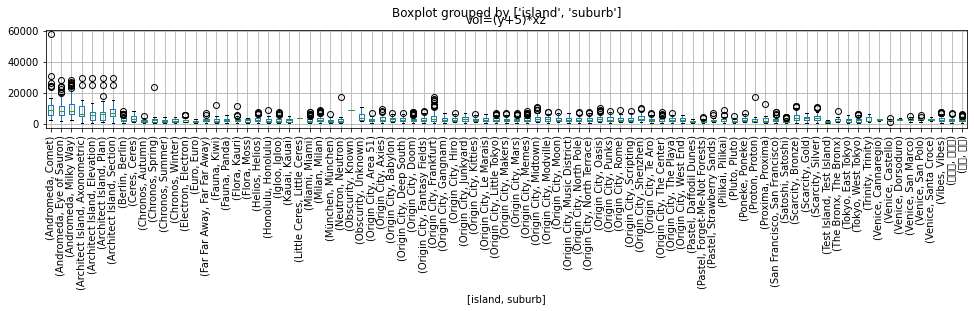

In [73]:
#hide_input 
import matplotlib.pyplot as plt
rdf.boxplot(column=['vol=(y+5)*xz'], by=['island', 'suburb'], rot=90, figsize=(16,4), layout=(2, 1))
plt.show()

C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 26032 (\N{CJK UNIFIED IDEOGRAPH-65B0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 23487 (\N{CJK UNIFIED IDEOGRAPH-5BBF}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 21306 (\N{CJK UNIFIED IDEOGRAPH-533A}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 49436 (\N{HANGUL SYLLABLE SEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\carlos\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50872

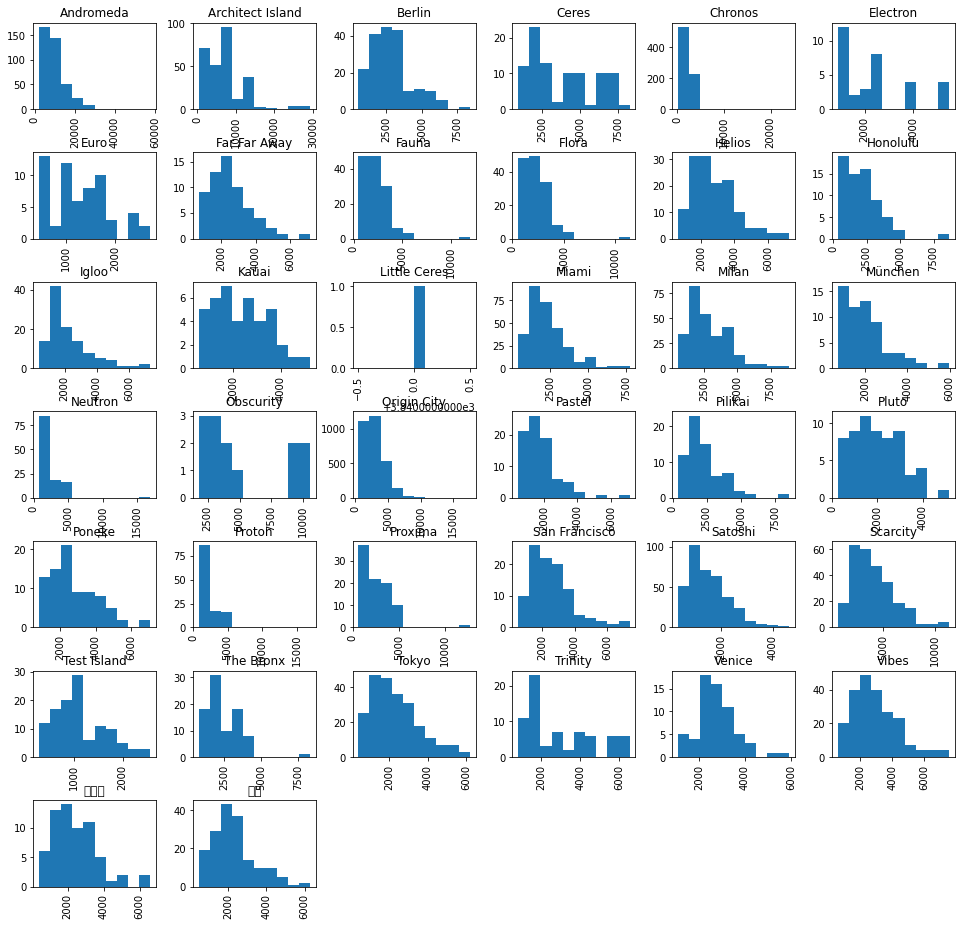

In [74]:
#hide_input 
rdf.hist(by=['island'], column = 'vol=(y+5)*xz', figsize=(16,16))
plt.show()

In [75]:
rdf.head()

,index,id,address,suburb,island,name,area,owner,basement,x,y,z,vol=xyz,vol=(y+5)*xz
0,0,7028,Peacock Gardens,Comet,Andromeda,None,2223,cv_team,True,39,21,57,46683,57798
1,1,7593,5 Corbusier Ave,Section,Architect Island,None,792,cv_team,False,18,32,44,25344,29304
2,2,7595,3 Wright Street,Plan,Architect Island,None,792,cv_team,False,44,32,18,25344,29304
3,3,7594,3 Corbusier Ave,Axonometric,Architect Island,None,792,cv_team,False,18,32,44,25344,29304
4,4,7592,3 Gaudi Terrace,Elevation,Architect Island,None,792,cv_team,False,44,32,18,25344,29304


In [76]:
%%capture
!pip install pivottablejs

In [78]:
#hide_input 
# https://github.com/JasonKessler/scattertext
# https://colab.research.google.com/drive/1VIMd9jhpNgB9siYlTSFqjV62mMQQFx4K

from pivottablejs import pivot_ui
from IPython.display import HTML
#if using locally you can just use the following to display the output: pivot_ui(df)
# As we are using colab, we will just download the output - this can then be opened in a new tab in the browser

import IPython

pivot_ui( rdf, outfile_path='../docs/tables/parcelsPivotTable.html')
# IPython.display.HTML(filename='../docs/tables/parcelsPivotTable.html')

from IPython. display import clear_output
clear_output()

## Filtering Parcels

&emsp; Information about a specific parcel is available by adding it's parcel number + .json to the end of the following url: https://www.cryptovoxels.com/api/parcels/ This data can then be filtered en-mass to search for certain properties, or inspected individually.  For example, here is a [map](https://cvminigames.com/blog/docs/maps/cv_book_map.html) of all the guestbooks! The information explored this far can be interactively explored standalone [here](https://cvminigames.com/blog/docs/tables/parcelsPivotTable.html)